In [3]:
import pandas as pd
import os
import numpy as np
dataset = pd.read_csv('to_from_data.csv')
dataset

,aid,institution_id,from_institution_id,from_oid,from_name,from_ranking,from_latitude,from_longitude,aid.1,postype,job_inst,institution_id.1,to_institution_id,to_oid,startdate,to_rank,to_latitude,to_longitude
0,35927,19622,747,886,Princeton University - Economics,13,40.349067,-74.655533,35927,3.0,University of Essex,19284,366,428,2003-01-11,49,51.877726,0.947207
1,236,19622,747,886,Princeton University - Economics,13,40.349067,-74.655533,236,9.0,University of Wisconsin-Madison,19047,73,85,2008-09-01,31,43.076501,-89.405298
2,614,19622,747,886,Princeton University - Economics,13,40.349067,-74.655533,614,7.0,University of Pennsylvania,19104,137,157,2008-01-01,6,39.953339,-75.194527
3,731,19622,747,886,Princeton University - Economics,13,40.349067,-74.655533,731,1.0,Duke University,19998,17,24,2008-01-01,15,36.001426,-78.938229
4,895,19622,747,886,Princeton University - Economics,13,40.349067,-74.655533,895,7.0,University of Cambridge,19093,120,139,2011-09-01,42,52.201012,0.108491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,28773,19163,189,220,Universita Commerciale Luigi Bocconi - Bocconi...,25,45.448802,9.189861,28773,6.0,Northwestern University,19003,18,25,2019-01-01,12,42.057154,-87.671636
964,25093,20000,17,1221,Duke University - Fuqua,15,35.998840,-78.947280,25093,1.0,university of pennsylvania,19104,137,157,2016-07-01,6,39.953339,-75.194527
965,26440,19127,158,522,Carnegie Mellon University - Tepper School of ...,51,40.441094,-79.942201,26440,NaN,carnegie mellon university,19127,158,522,2016-07-01,51,40.441094,-79.942201
966,43456,19104,137,157,University of Pennsylvania - Department of Eco...,6,39.953339,-75.194527,43456,1.0,Georgetown University,19062,85,99,2019-08-01,60,38.908985,-77.073475


In [4]:
dataset.shape
dataset.dtypes

aid                      int64
institution_id           int64
from_institution_id      int64
from_oid                 int64
from_name               object
from_ranking             int64
from_latitude          float64
from_longitude         float64
aid.1                    int64
postype                float64
job_inst                object
institution_id.1         int64
to_institution_id        int64
to_oid                   int64
startdate               object
to_rank                  int64
to_latitude            float64
to_longitude           float64
dtype: object

In [5]:
import networkx as nx
FG = nx.from_pandas_edgelist(dataset, source='to_oid', target='from_oid', edge_attr=True,
                            create_using=nx.DiGraph())
FG.nodes()

NodeView((428, 886, 85, 157, 24, 139, 37, 1176, 336, 362, 354, 40, 1419, 760, 1275, 603, 107, 92, 29, 1194, 406, 154, 84, 508, 881, 186, 394, 167, 20, 407, 143, 540, 1050, 235, 217, 67, 189, 902, 203, 420, 507, 332, 343, 593, 25, 41, 99, 298, 334, 669, 36, 793, 1306, 1042, 1357, 676, 476, 908, 623, 185, 83, 522, 1035, 1273, 49, 1351, 1043, 105, 432, 361, 177, 499, 1151, 1328, 767, 631, 403, 942, 660, 775, 570, 86, 130, 1338, 688, 1345, 204, 1184, 876, 1356, 633, 119, 502, 479, 144, 596, 1343, 28, 592, 128, 693, 1347, 310, 1106, 1352, 90, 1262, 79, 765, 1305, 220, 811, 109, 221, 1077, 1174, 212, 376, 952, 500, 1192, 1217, 1390, 72, 80, 1206, 250, 532, 680, 1203, 286, 551, 763, 1233, 1384, 1191, 612, 1221, 1295, 1331, 995, 573, 810, 511, 97, 1407, 898, 1064, 1358, 346, 1204, 1334))

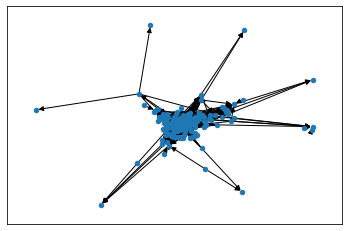

In [7]:
import matplotlib.pyplot as plt
nx.draw_networkx(FG, with_labels=False,node_size=20)

In [8]:
sorted(nx.algorithms.pagerank(FG).items(), key=lambda student: student[1]) # Notice the 3 airports from which all of our 100 rows of data originates


[(428, 0.0010783862302346289),
 (1176, 0.0010783862302346289),
 (1419, 0.0010783862302346289),
 (760, 0.0010783862302346289),
 (1275, 0.0010783862302346289),
 (1194, 0.0010783862302346289),
 (508, 0.0010783862302346289),
 (540, 0.0010783862302346289),
 (1050, 0.0010783862302346289),
 (420, 0.0010783862302346289),
 (507, 0.0010783862302346289),
 (332, 0.0010783862302346289),
 (343, 0.0010783862302346289),
 (593, 0.0010783862302346289),
 (41, 0.0010783862302346289),
 (298, 0.0010783862302346289),
 (669, 0.0010783862302346289),
 (793, 0.0010783862302346289),
 (1306, 0.0010783862302346289),
 (1042, 0.0010783862302346289),
 (1357, 0.0010783862302346289),
 (908, 0.0010783862302346289),
 (623, 0.0010783862302346289),
 (185, 0.0010783862302346289),
 (1035, 0.0010783862302346289),
 (1273, 0.0010783862302346289),
 (1351, 0.0010783862302346289),
 (1043, 0.0010783862302346289),
 (432, 0.0010783862302346289),
 (1151, 0.0010783862302346289),
 (1328, 0.0010783862302346289),
 (767, 0.00107838623023462

In [9]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

1.0875304984315093